In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import cv2
from pprint import pprint
%matplotlib notebook

In [2]:
models = '/home/manor/anaconda3/envs/openAIenv/baselines/models'
assert os.path.exists(models)

In [3]:
kls = []

for f1 in os.listdir(models):
    if not f1.startswith('a2c'): continue
    for f2 in os.listdir(os.path.join(models, f1)):
        if not f2.startswith('res_'): continue
        assert os.path.join(models, f1, f2, 'kl.npz') 
        kls.append(os.path.join(models, f1, f2, 'kl.npz'))
kls

['/home/manor/anaconda3/envs/openAIenv/baselines/models/a2c1/res_both_05_dir/kl.npz',
 '/home/manor/anaconda3/envs/openAIenv/baselines/models/a2c1/res_both_09_dir/kl.npz',
 '/home/manor/anaconda3/envs/openAIenv/baselines/models/a2c1/res_both_01_dir/kl.npz',
 '/home/manor/anaconda3/envs/openAIenv/baselines/models/a2c1/res_prior_09_dir/kl.npz',
 '/home/manor/anaconda3/envs/openAIenv/baselines/models/a2c1/res_both_03_dir/kl.npz',
 '/home/manor/anaconda3/envs/openAIenv/baselines/models/a2c1/res_prior_05_dir/kl.npz',
 '/home/manor/anaconda3/envs/openAIenv/baselines/models/a2c1/res_last_dir/kl.npz',
 '/home/manor/anaconda3/envs/openAIenv/baselines/models/a2c1/res_prior_07_dir/kl.npz',
 '/home/manor/anaconda3/envs/openAIenv/baselines/models/a2c1/res_reg_dir/kl.npz',
 '/home/manor/anaconda3/envs/openAIenv/baselines/models/a2c1/res_prior_03_dir/kl.npz',
 '/home/manor/anaconda3/envs/openAIenv/baselines/models/a2c1/res_both_07_dir/kl.npz',
 '/home/manor/anaconda3/envs/openAIenv/baselines/models/a

In [4]:
res = {}

for klfile in kls:
    agent = klfile.split('/')[-3]
    exp   = klfile.split('/')[-2][4:-4]
#     if 'both' in exp: continue
    kl_t = np.load(klfile, allow_pickle=True)
    res[agent + '_' + exp] = kl_t['kl_original']

res

{'a2c1_both_05': array([0.86931449, 2.06574631, 4.52864408, 5.43072271, 5.43175554,
        5.39533472, 5.46540737, 5.66933107, 5.70133638, 5.99814701,
        6.06549788, 6.03177547, 6.09074688, 6.0254283 , 5.78595543,
        5.90428257, 6.03086424, 5.79852867, 5.76915407, 5.78397799,
        5.68039417, 5.60389757, 5.55545664, 5.48047352, 5.41009092,
        5.44491863, 5.40432692]),
 'a2c1_both_09': array([0.8694917 , 2.43004966, 5.17798948, 6.35944605, 6.52007866,
        6.60467052, 6.77929544, 7.06436396, 7.1970129 , 7.55470133,
        7.66615438, 7.69134426, 7.79627132, 7.76527786, 7.5711875 ,
        7.72647142, 7.86587715, 7.6902256 , 7.68308973, 7.73817682,
        7.67121696, 7.61282969, 7.61243486, 7.57108498, 7.53450203,
        7.59341717, 7.59756994]),
 'a2c1_both_01': array([0.869914  , 1.58002853, 3.94563007, 4.84698057, 4.84116268,
        4.80049515, 4.83304644, 4.99512196, 4.99487543, 5.27376413,
        5.32589293, 5.23374701, 5.24665737, 5.09253502, 4.79864264,


<IPython.core.display.Javascript object>


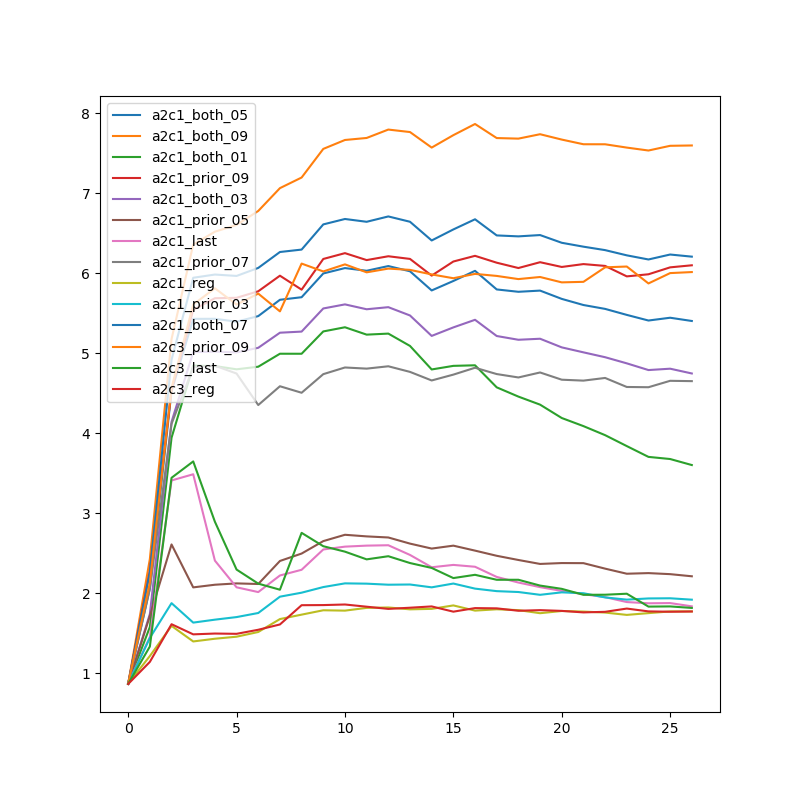

In [7]:
fig, ax = plt.subplots(figsize=(8,8))

for label, kl in res.items():
    plt.plot(kl, label=label)

plt.legend()

plt.show()
